# Seaborn

Credits:

- [2021 Python for Machine Learning & Data Science Masterclass by Jose Portilla Udemy](https://www.udemy.com/course/python-for-machine-learning-data-science-masterclass/)

- [Seaborn](https://seaborn.pydata.org/) is a statistical plotting library that is specifically designed to interact well with Pandas DataFrames to create common statistical plot types.
- Seaborn is built directly off of Matplotlib but uses a simpler “one-line” syntax.
- When using seaborn, we trade-off customization for ease of use.
- However, since its built directly off of Matplotlib, we can actually still make plt method calls to directly affect the resulting seaborn plot.
- A typical seaborn plot uses one line of code, for example:
``` sns.scatterplot(x='salary',y='sales',data=df) ```
- Seaborn takes in a pandas DataFrame and then the user provides the corresponding string column names for x and y (depending on the plot type).
- How do I choose which plot to use?
    - It depends on what questions or relationships you are trying to understand.
    - Google Image Searching “Choosing a plot visualization” will yield many useful flowcharts.





- [Scatter Plots](#1)
    - scatterplot(), hue, size, alpha, style, palette (cmap)
- [Distribution Plots](#2)
    - rugplot(), displot(), histplot(), kdeplot()
- [Categorical Plots](#3)
    - countplot(), barplot()
- [Distribution within Categories](#4)
    - boxplot(), violinplot(), swarmplot(), boxenplot()
- [Comparison Plots](#5)
    - jointplot(), pairplot()
- [Seaborn Grids](#6)
    - catplot(), PairGrid()
- [Matrix Plots](#7)
    - heatmap(), clustermap()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/dm_office_sales.csv')
df.sample(5)

,division,level of education,training level,work experience,salary,sales
915,printers,some college,2,4,75595,335949
454,peripherals,high school,2,7,84404,384044
891,printers,bachelor's degree,2,2,73312,237554
843,peripherals,associate's degree,1,10,111442,441106
9,computer hardware,associate's degree,1,5,96731,326667


<a id='1'></a>
## Scatter Plots

Scatter plots show the relationship between two continuous features. Recall that continuous features are numeric variables that can take any number of values between any two values. Continuous Feature Examples: Age, Height, Salary, Temperature, Prices. A **continuous** feature allows for a value to always be between two values.

Not to be confused with categorical features which represent distinct and unique categories: Colors, Shapes, Names

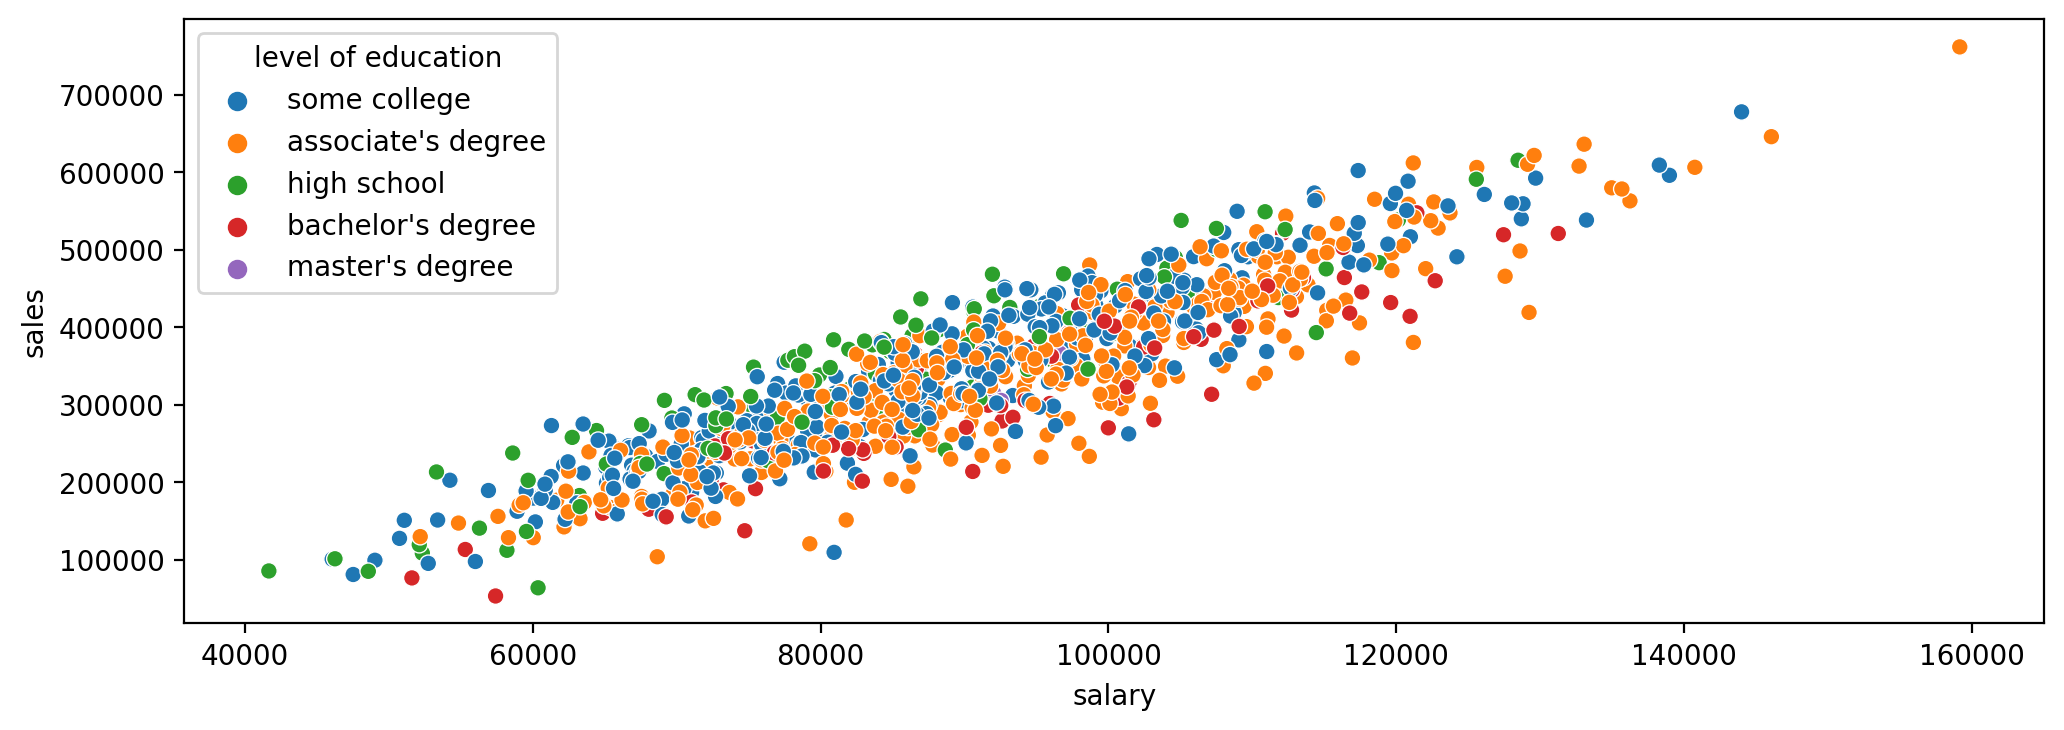

In [3]:
# directly use matlplotlib commands with seaborn commands
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='salary', y='sales', data=df, 
                hue='level of education', # color with catag. data
               );

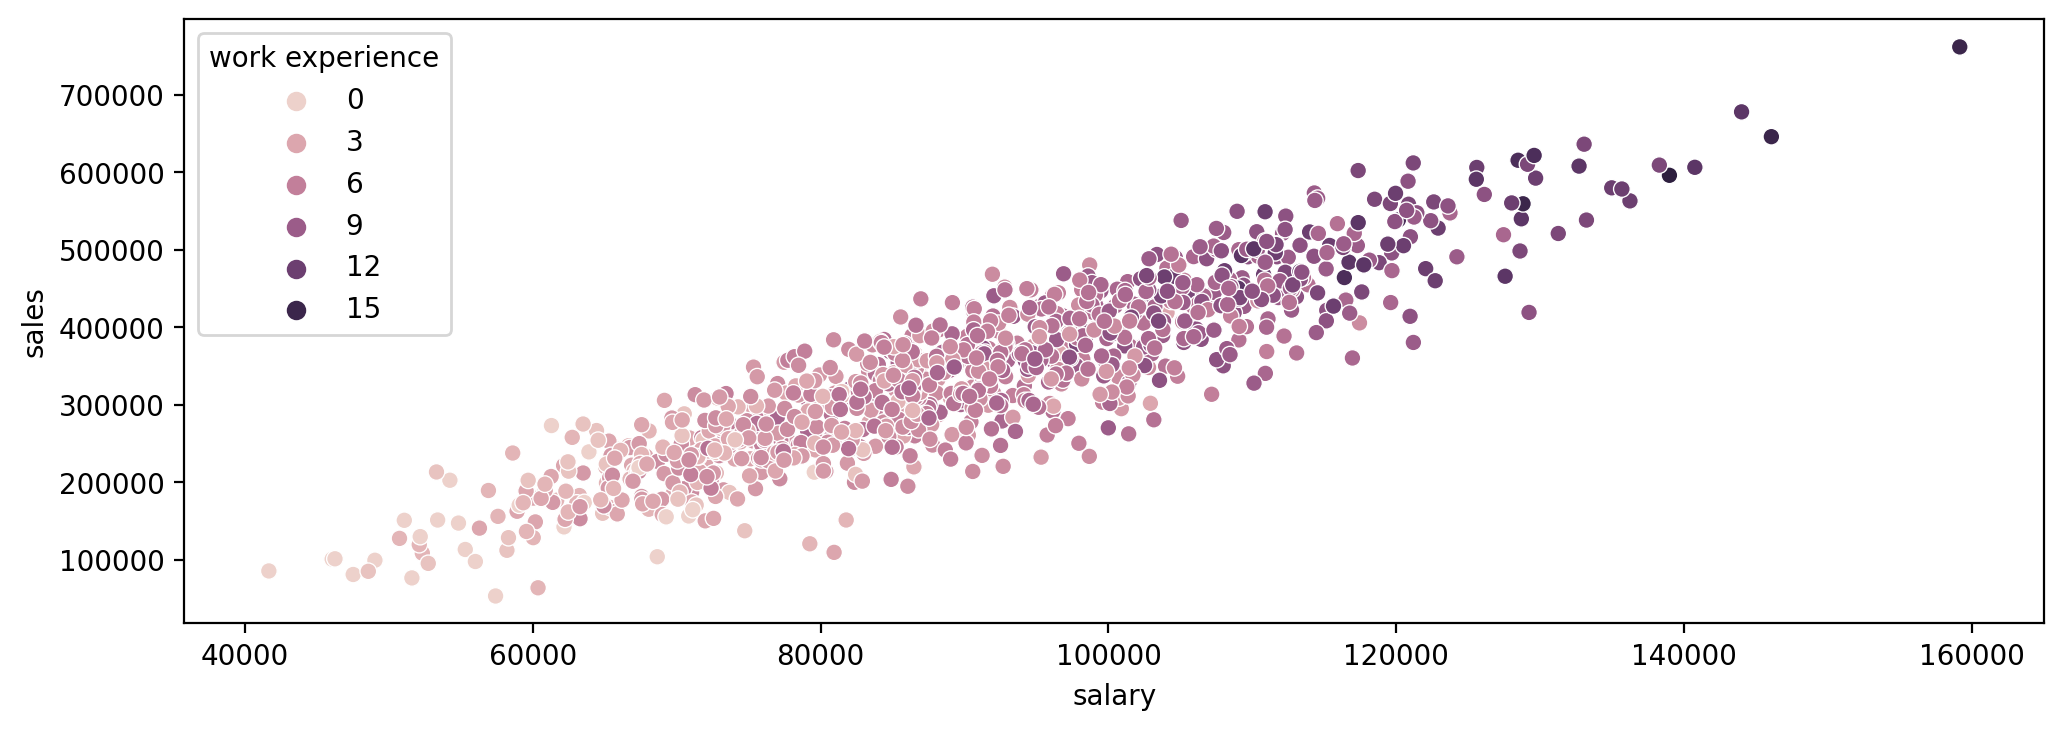

In [4]:
plt.figure(figsize=(12,4), dpi=200)
sns.scatterplot(x='salary', y='sales', data=df, 
                hue='work experience', # color with cont. data
               );

Choosing a palette from Matplotlib's [cmap](https://matplotlib.org/tutorials/colors/colormaps.html). The parameter colormap (**cmap**) in Matplotlib is the same **palette** in Seaborn. 

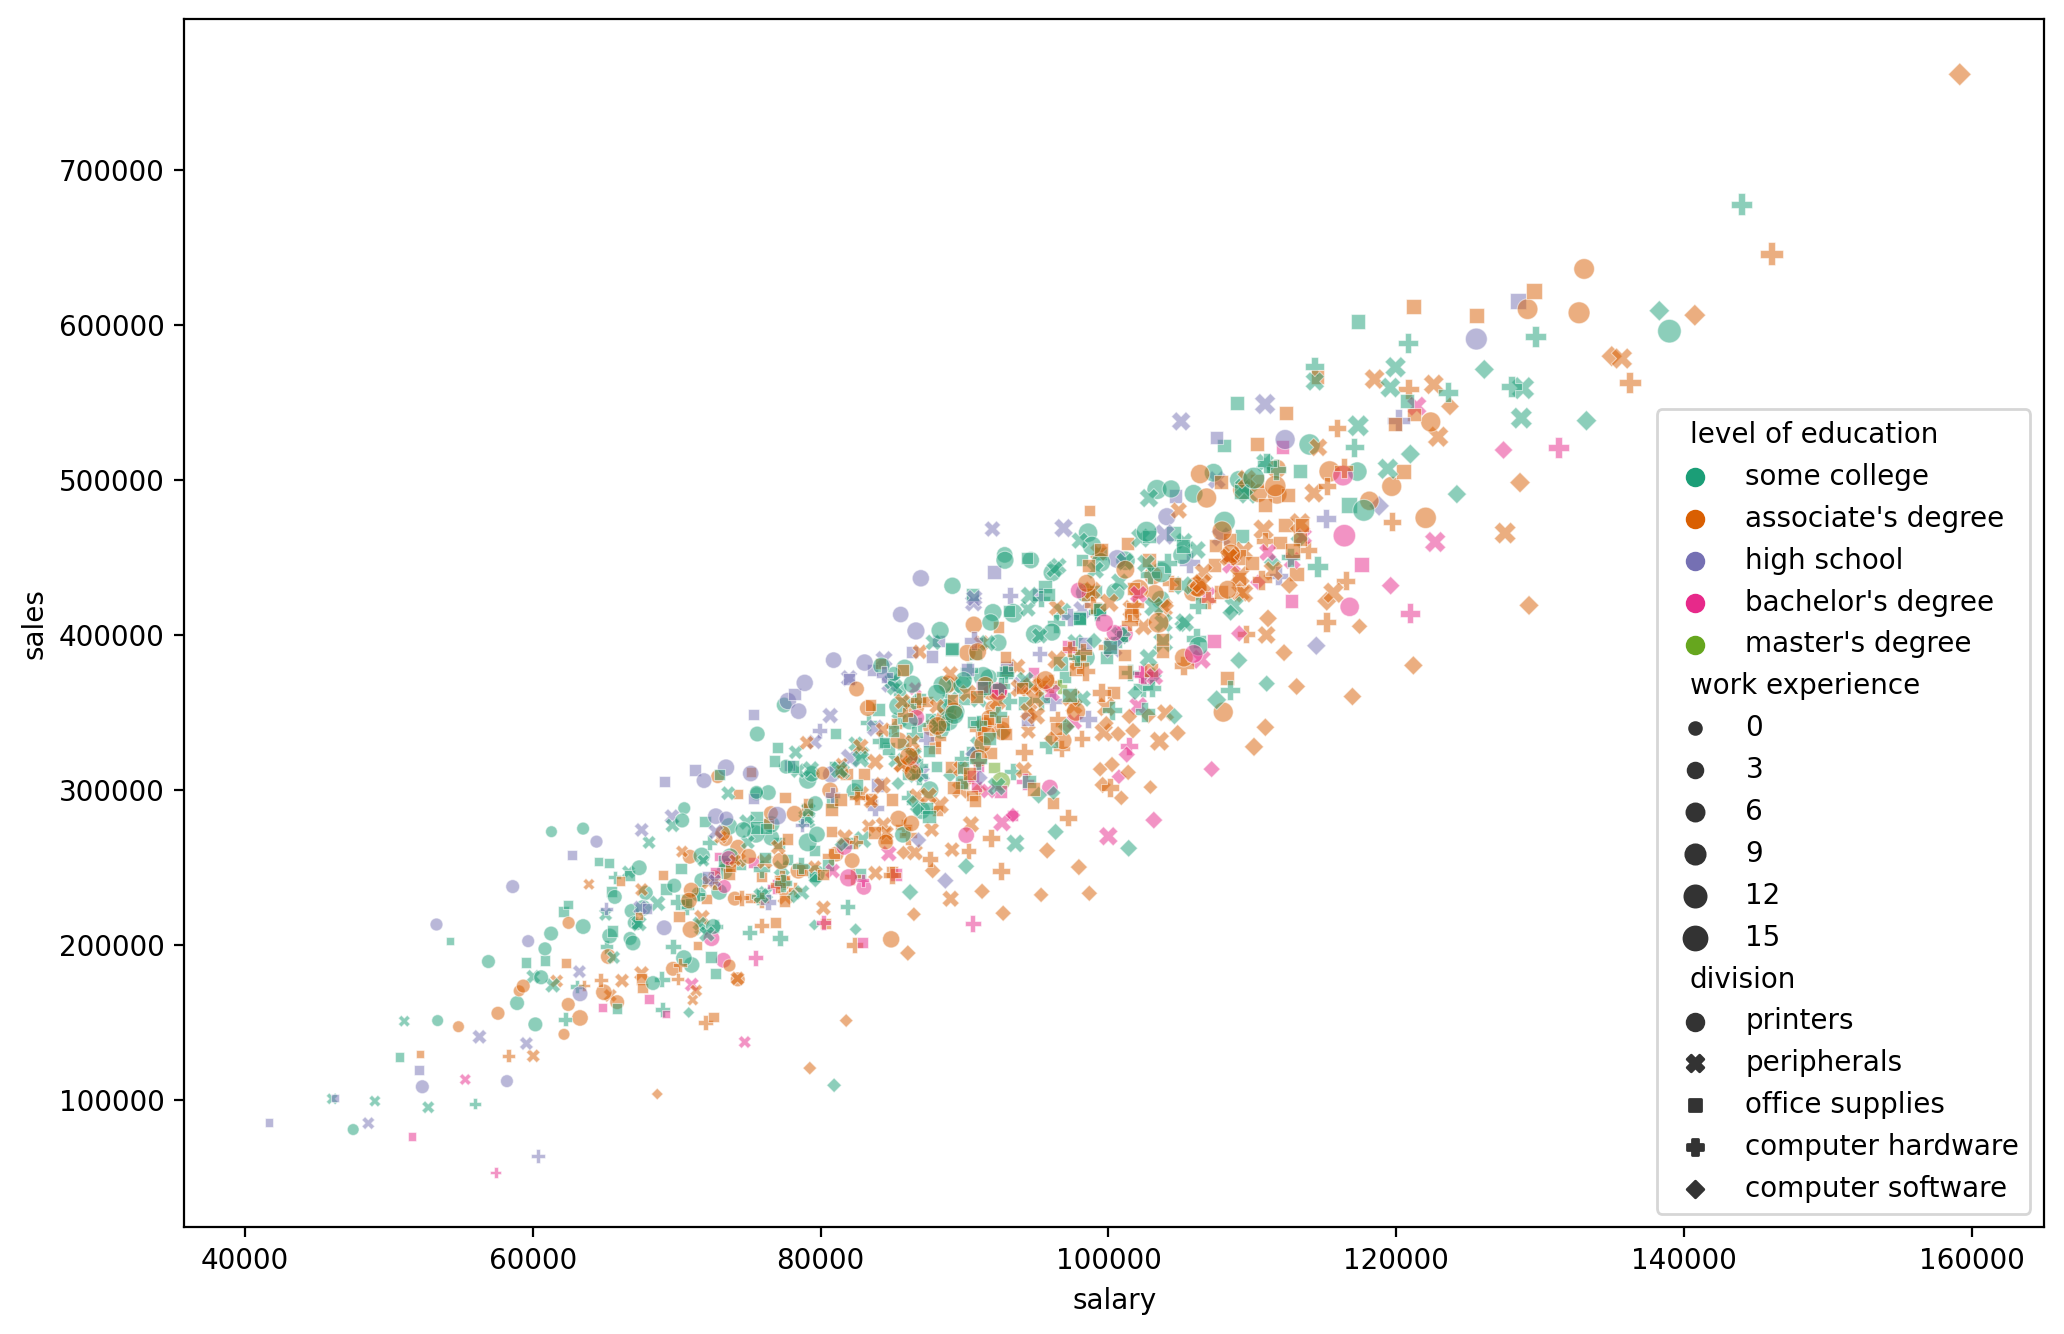

In [5]:
plt.figure(figsize=(12,8), dpi=200)
sns.scatterplot(x='salary', y='sales', data=df, 
                hue='level of education', # color with catag. data
                size='work experience',   # size based on experince
                alpha=0.5,                # for transparency
                style='division', # marker style based on division
                                  # has to be a catag. data  
                palette='Dark2'   # cmap chosen for catag. data
               );
plt.savefig('images/scatter_plot.png') # same as Matplotlib

<a id='2'></a>
## Distribution Plots

- Distribution plots display a single continuous feature and help visualize properties such as deviation and average values.
- There are 3 main distribution plot types:
    - Rug Plot (Immediately see the outliars)
    - Histogram
    - KDE (Kernel Density Estimation) Plot
- KDE is a method of estimating a probability density function of a random variable. In simpler terms, it is a way of estimating a continuous probability curve for a finite data sample.

In [6]:
df = pd.read_csv('data/dm_office_sales.csv')
df.sample(5)

,division,level of education,training level,work experience,salary,sales
857,office supplies,associate's degree,2,1,72745,238238
260,office supplies,high school,0,0,41660,85373
796,office supplies,associate's degree,1,3,67633,171932
690,computer hardware,associate's degree,2,0,63577,173739
572,computer hardware,some college,0,6,92809,374641


### rugplot()

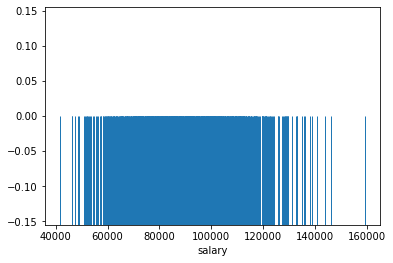

In [7]:
# rug plot (1D scatter plot)
sns.rugplot(x='salary', data=df, 
            height=0.5 # height of rugs
           );

### displot()

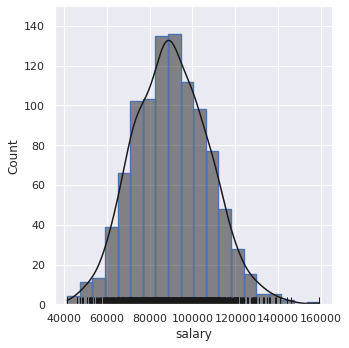

In [8]:
# dis plot (DO NOT USE distplot()) -- most useful
sns.set(style='darkgrid') # for bkgrnd style (for all future plots)
sns.displot(x='salary', data=df, 
            bins=20,  # number of bins
            rug=True, # see rug plot on top to dis plot
            kde=True, # see KDE on top of dis plot
            color='k', edgecolor='b', lw=4 # same at Matplotlib
           );
sns.set(style='white')

### hisplot()
The hisplot() is similar to dis plot but less functinality
```sns.histplot(x='salary', data=df);```

### kdeplot()

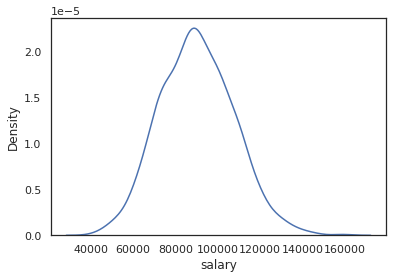

In [9]:
# KDE plot
sns.kdeplot(x='salary', data=df);

### Example of age data

In [10]:
np.random.seed(42)
sample_ages = np.random.randint(0,100,200)
sample_ages = pd.DataFrame(sample_ages, columns=['age'])

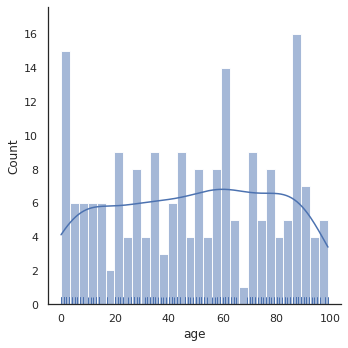

In [11]:
sns.displot(x='age', data=sample_ages, rug=True, bins=30,kde=True);

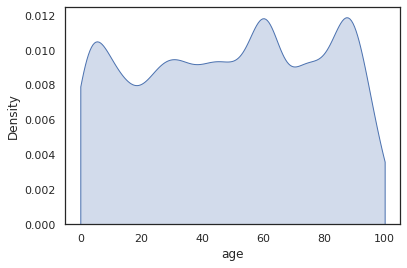

In [12]:
sns.kdeplot(x='age', data=sample_ages, 
            clip=[0,100],  # for realistic bounds
            bw_adjust=0.5, # adjust bandwidth (default is 1)
            shade=True     # shade the plot
           );

<a id='3'></a>
## Categorical Plots

- The categorical plots discussed here will display a statistical metrics per a category. For example mean value per category or a count of the number of rows per category. It is the visualization equivalent of a groupby() call.
- The two main types of plots for this are:
    - countplot(): Counts number of rows per category.
    - barplot(): General form of displaying any chosen metric per category.

### countplot()

level of education  division         
associate's degree  office supplies      108
some college        printers             107
associate's degree  peripherals          102
some college        office supplies       95
associate's degree  printers              95
some college        peripherals           89
                    computer hardware     65
associate's degree  computer hardware     62
                    computer software     45
some college        computer software     36
high school         peripherals           29
                    printers              27
                    office supplies       27
bachelor's degree   peripherals           23
                    office supplies       21
                    printers              20
high school         computer hardware     19
bachelor's degree   computer hardware     12
                    computer software      9
high school         computer software      6
master's degree     computer hardware      1
                 

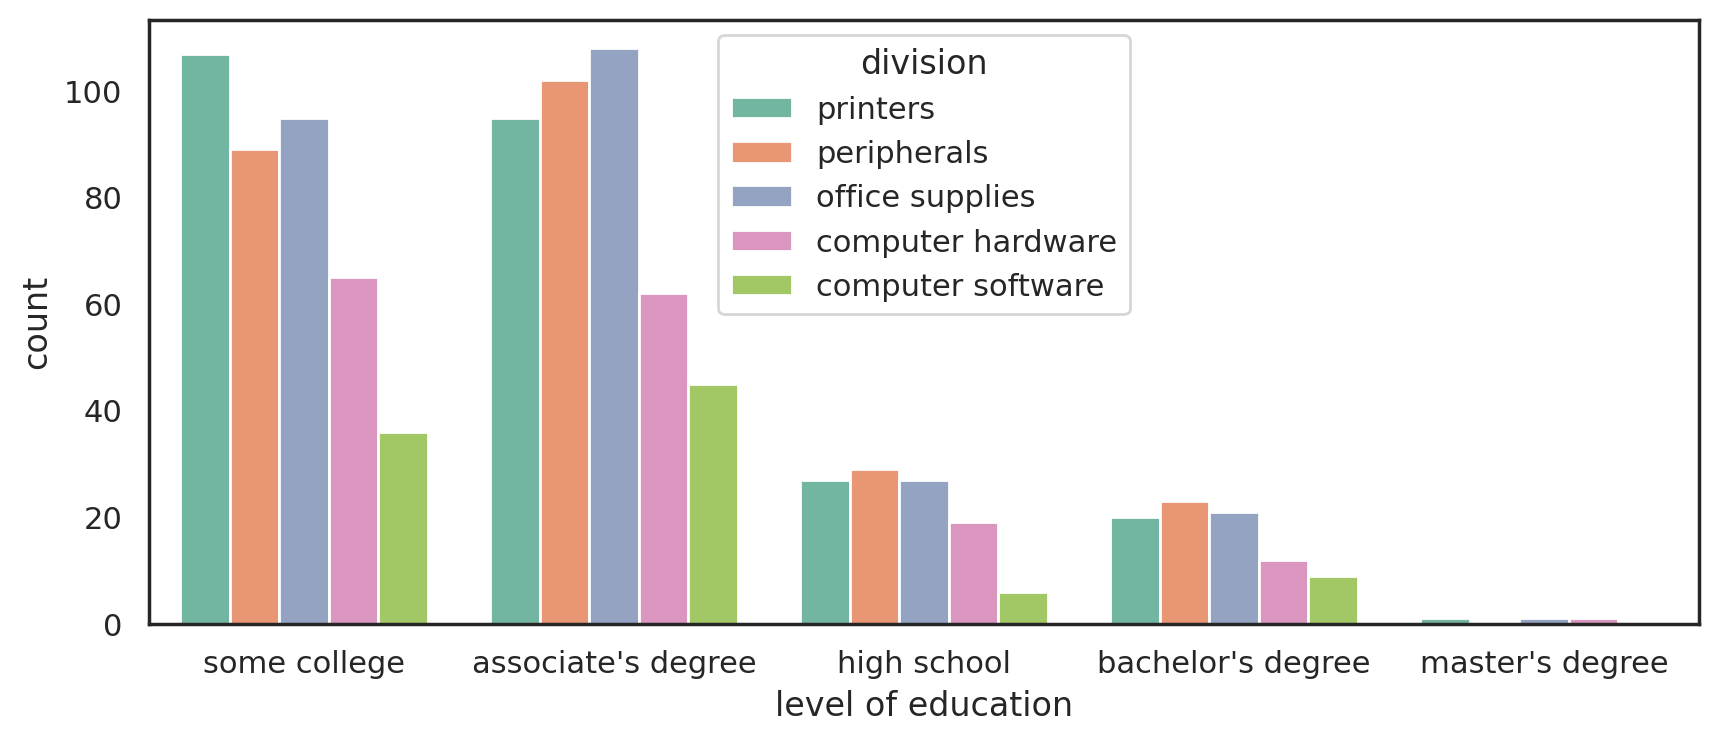

In [13]:
"""
Number of employees per level of education
"""

# table using Pandas DataFrame
#print(df['division'].value_counts())

# countplot() -- for catagorical data counting its rows on y-axis
#sns.countplot(x='division', data=df);


"""
Number of employees per level of education per division
"""

# table using Pandas DataFrame
print(df[['level of education', 'division']].value_counts())

# countplot() -- for catagorical data counting its rows on y-axis
plt.figure(figsize=(10,4), dpi=200)
sns.countplot(x='level of education', data=df, hue='division',
             palette='Set2');

### barplot()

                                               mean           std
level of education division                                      
associate's degree computer hardware   94300.290323  17160.761458
                   computer software  104628.533333  16898.219822
                   office supplies     92533.787037  15882.811634
                   peripherals         91789.470588  15349.645533
                   printers            89151.200000  18050.388285
bachelor's degree  computer hardware   92991.750000  20451.200010
                   computer software  108020.888889  10347.100928
                   office supplies     87330.285714  17193.908646
                   peripherals         96882.826087  16494.302037
                   printers            92552.000000  14498.296470
high school        computer hardware   90550.315789  15864.546550
                   computer software   98393.500000  14266.956729
                   office supplies     81681.666667  18770.707273
          

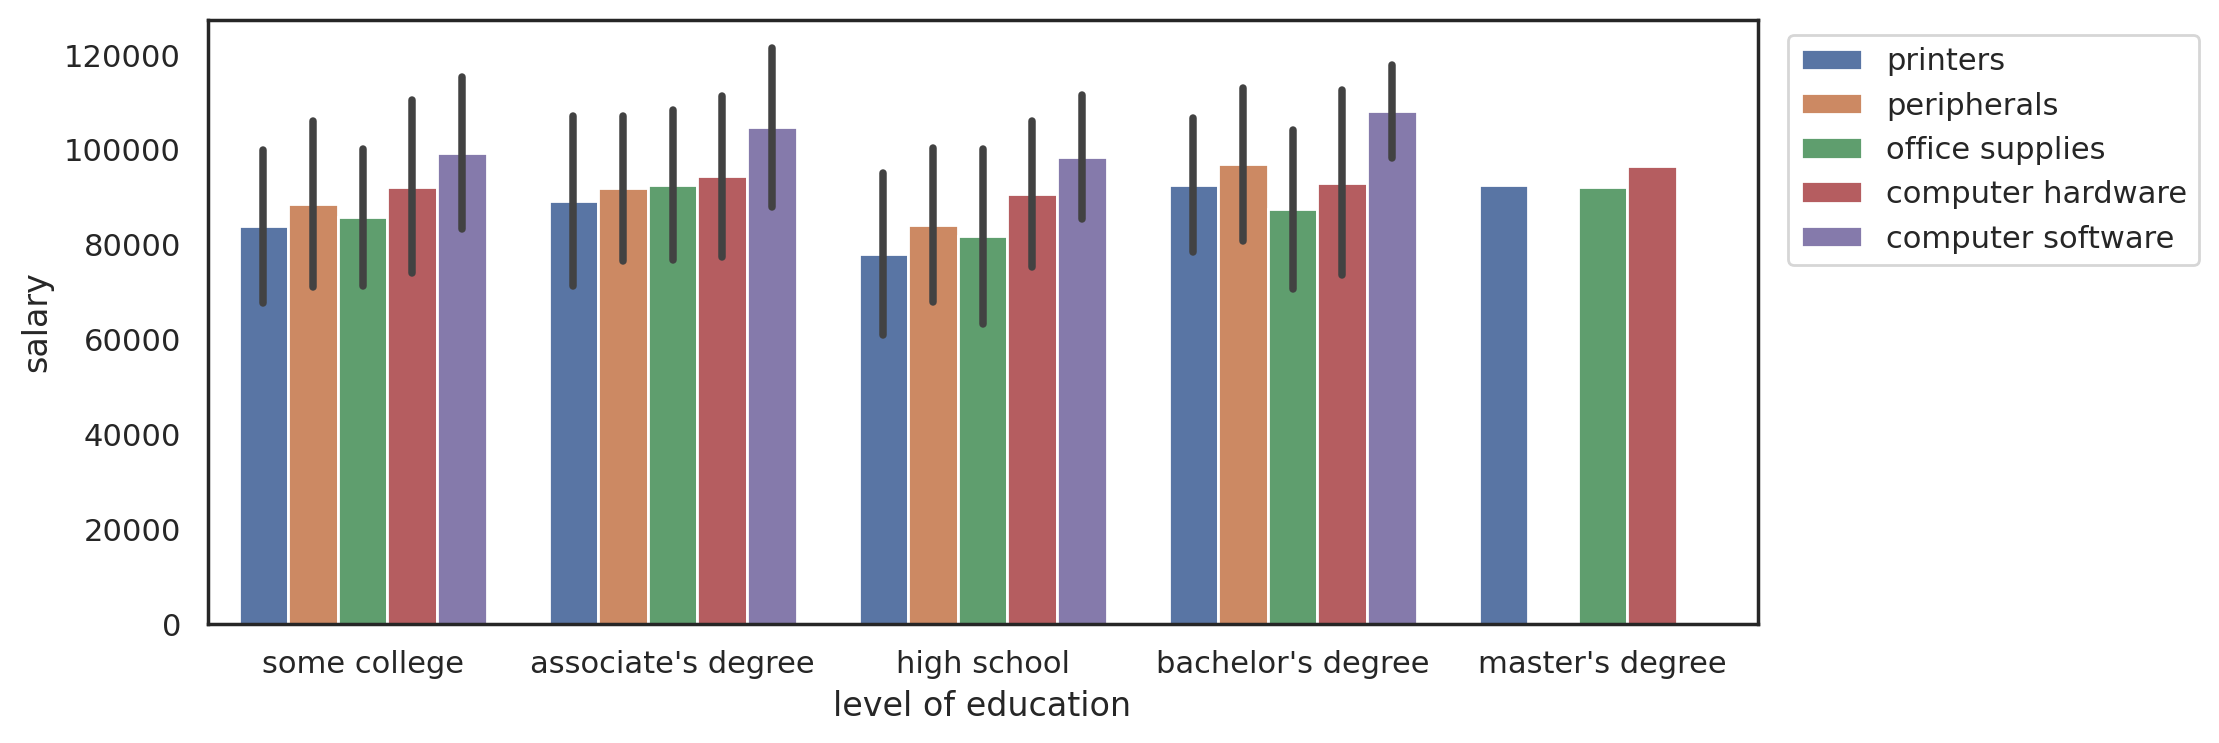

In [14]:
"""
Avg. salary of employees per level of education per division
"""

# table using Pandas DataFrame
print(df.groupby(['level of education', 'division'])\
      .describe()['salary'][['mean','std']])

# barplot() -- catagorical data with continuous data on y-axis
plt.figure(figsize=(10,4), dpi=200)
sns.barplot(x='level of education', data=df,
            y='salary',        # a continuous column
            estimator=np.mean, # like agg in Pandas
            ci='sd',           # confidence interval
            hue='division');
plt.legend(bbox_to_anchor=(1.01,1));

<a id='4'></a>
## Distribution within Categories

- What if we want to compare distributions across categories? For example, instead of the distribution of everyone’s salary, we can compare the distributions of salaries per level of education.
- Distribution within Categories
    - Boxplot
    - Violinplot
    - Swarmplot
    - Boxenplot (Letter-Value Plot)

In [15]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
717,female,group C,associate's degree,standard,completed,96,96,99
666,female,group C,some college,free/reduced,completed,63,73,71
575,male,group A,associate's degree,free/reduced,completed,40,55,53
113,female,group D,some college,standard,none,51,58,54
757,male,group E,bachelor's degree,free/reduced,completed,70,68,72


### boxplot()

The Boxplot displays the distribution of a continuous variable. It does this through the use of quartiles. Quartiles separate out the data into 4 equal number of data points:
- 25% of data points are in bottom quartile.
- 50th percentile (Q2) is the median.

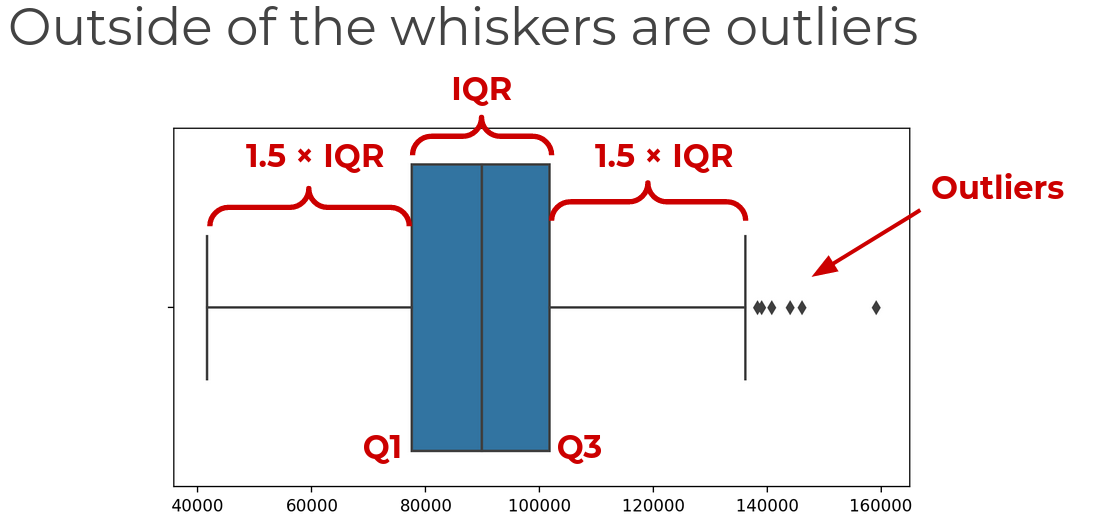

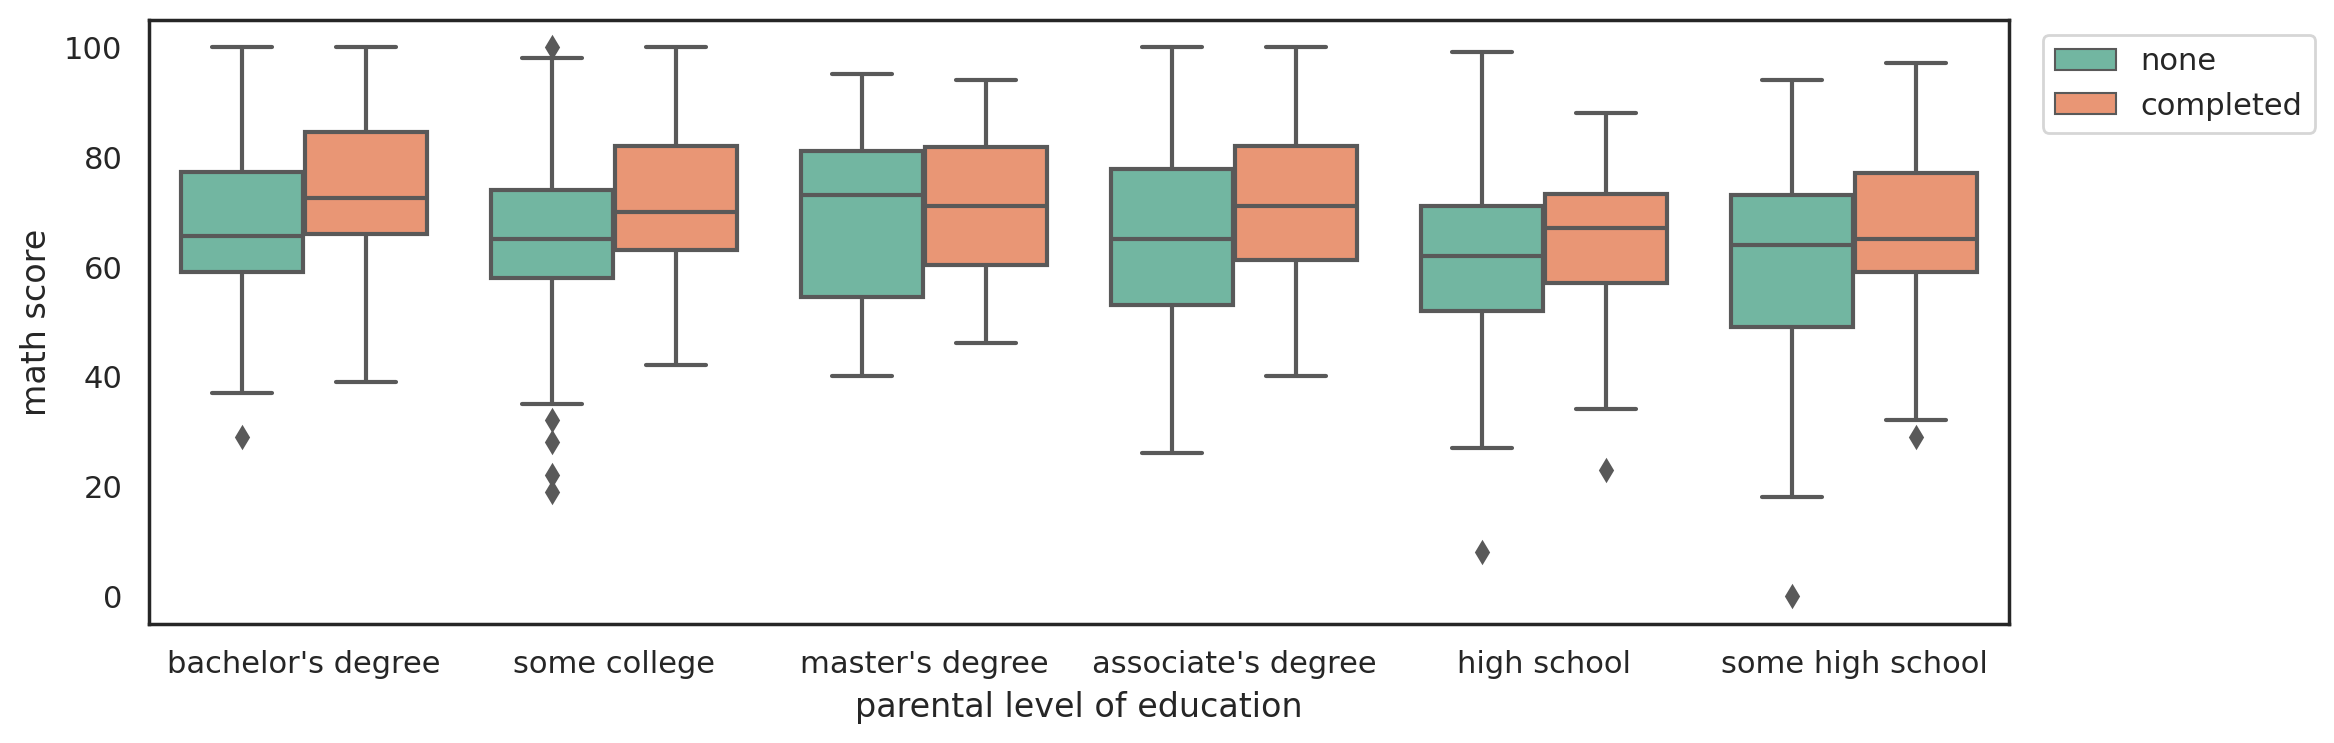

In [16]:
plt.figure(figsize=(12,4), dpi=200)
sns.boxplot(y='math score', data=df,
            x='parental level of education', # separate by catagory
            hue='test preparation course', # sub-catagory seperation
            palette='Set2');
plt.legend(bbox_to_anchor=(1.01,1));

### violinplot()

The violin plot plays a similar role as the box plot. It displays the probability density across the data using a KDE. We can imagine it as a mirrored KDE plot.

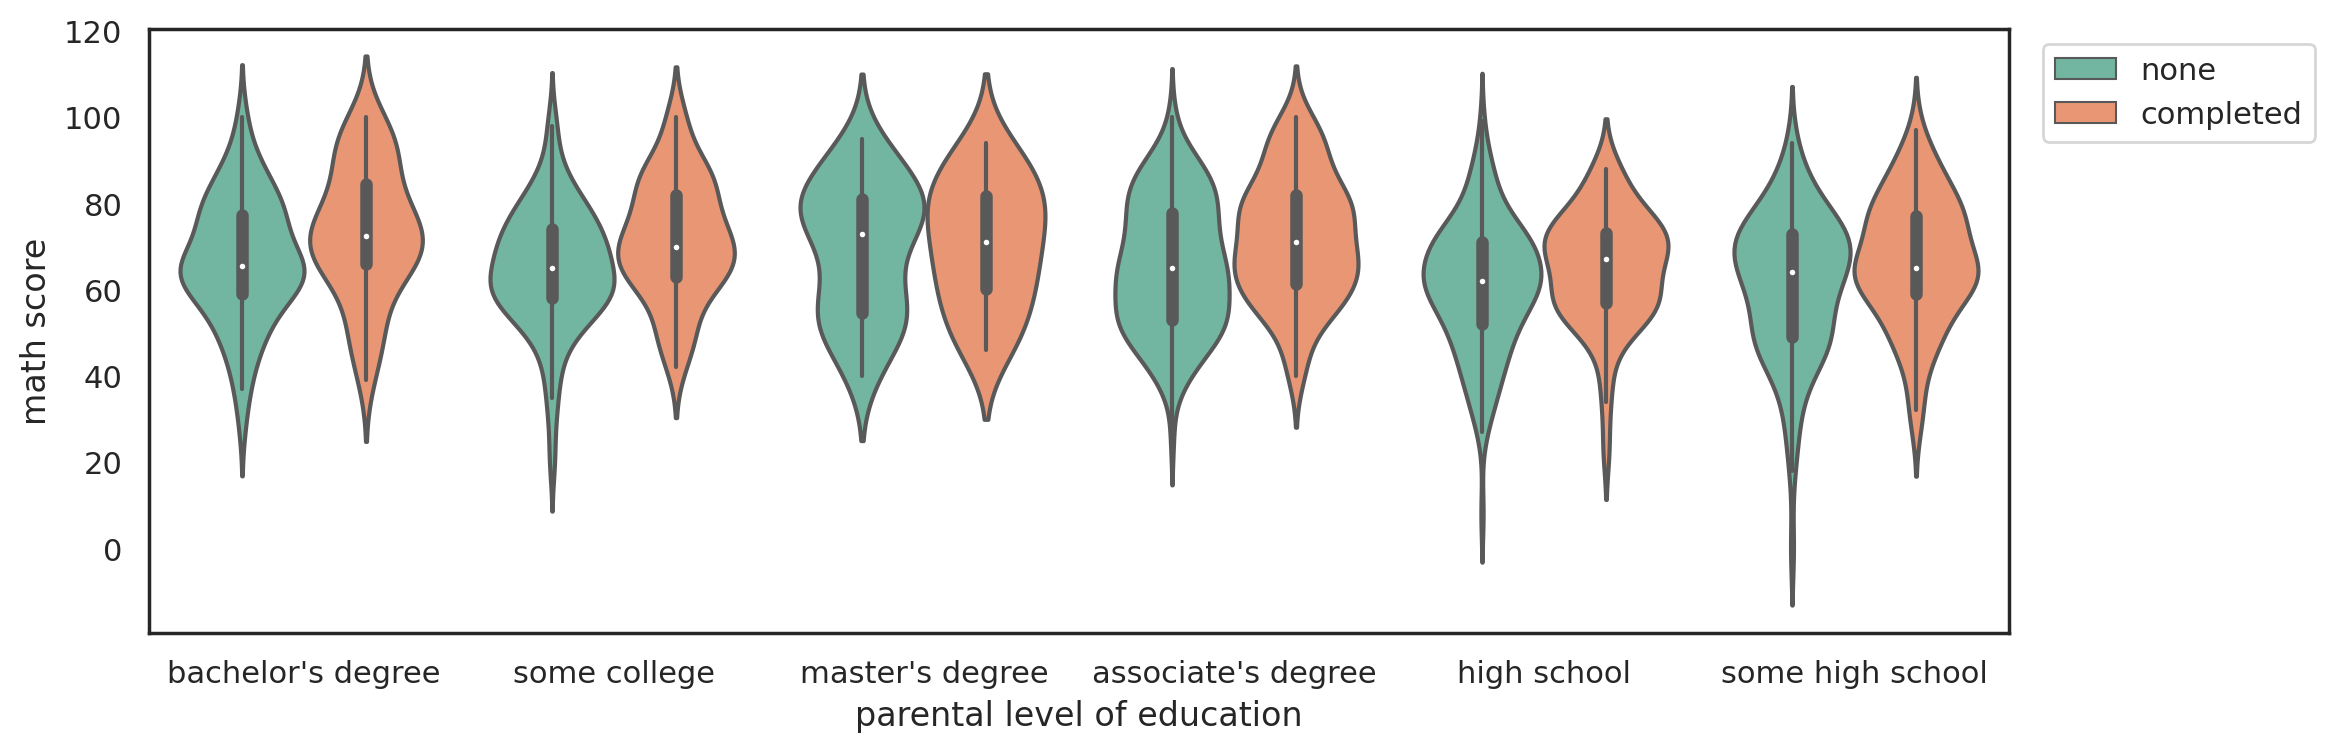

In [17]:
plt.figure(figsize=(12,4), dpi=200)
sns.violinplot(y='math score', data=df,
               x='parental level of education',
               hue='test preparation course',
               palette='Set2');
plt.legend(bbox_to_anchor=(1.01,1));

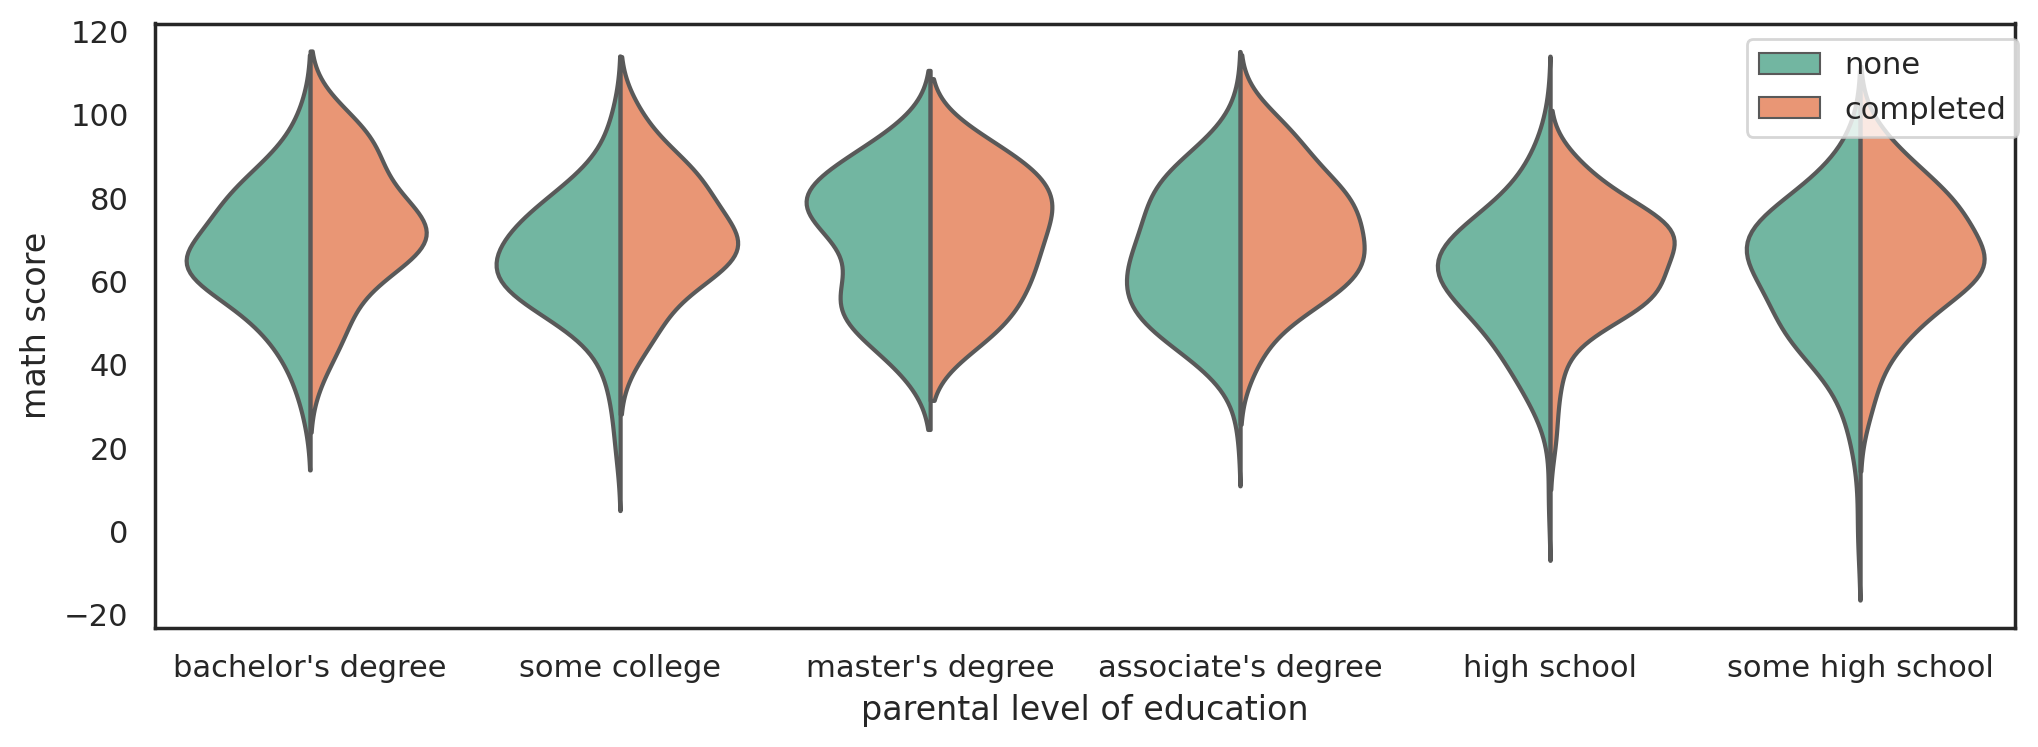

In [18]:
plt.figure(figsize=(12,4), dpi=200)
sns.violinplot(y='math score', data=df,
               x='parental level of education',
               hue='test preparation course',
               split=True, # 2 kdes for 2 halves of violin
               inner=None, # remove the boxplot
               bw=0.5,     # kde bandwidth
               palette='Set2');
plt.legend(bbox_to_anchor=(1.01,1));

### swarmplot() 

The swarmplot is very simple and simply shows all the data points in the distribution. For very large data sets, it won’t show all the points, but will display the general distribution of them.

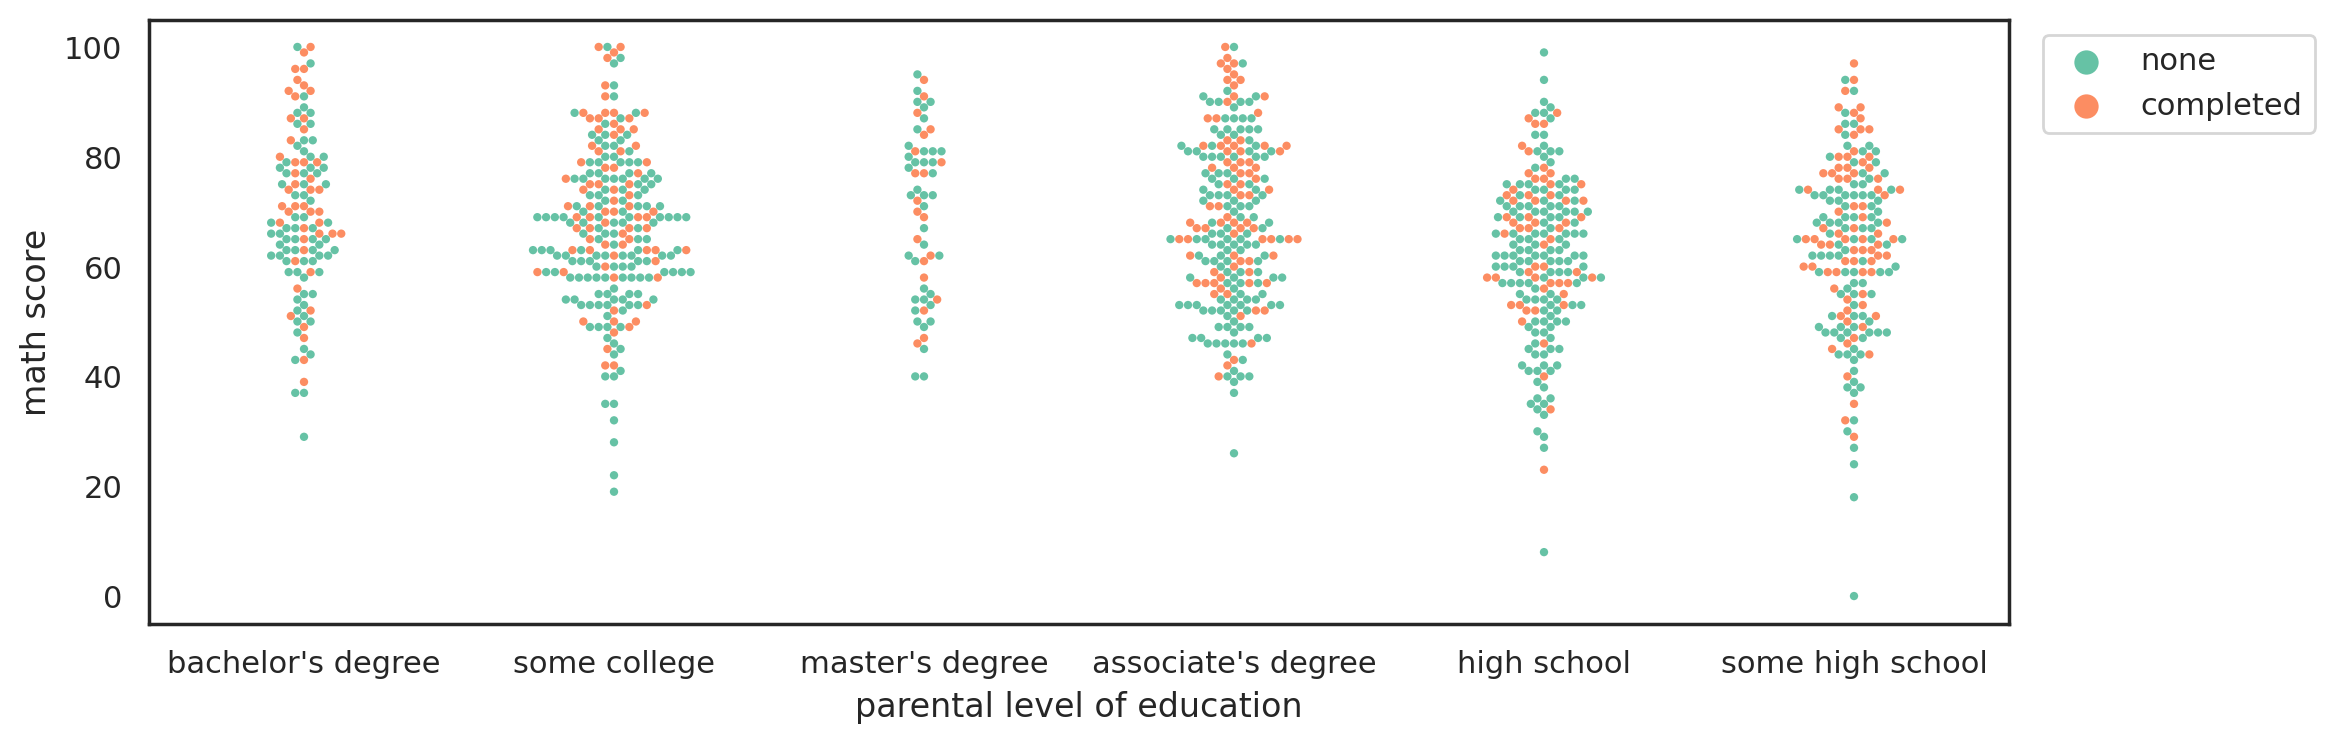

In [19]:
plt.figure(figsize=(12,4), dpi=200)
sns.swarmplot(y='math score', data=df,
              x='parental level of education',
              hue='test preparation course',
              size=3, # change size to accomodate all the points
              palette='Set2');
plt.legend(bbox_to_anchor=(1.01,1));

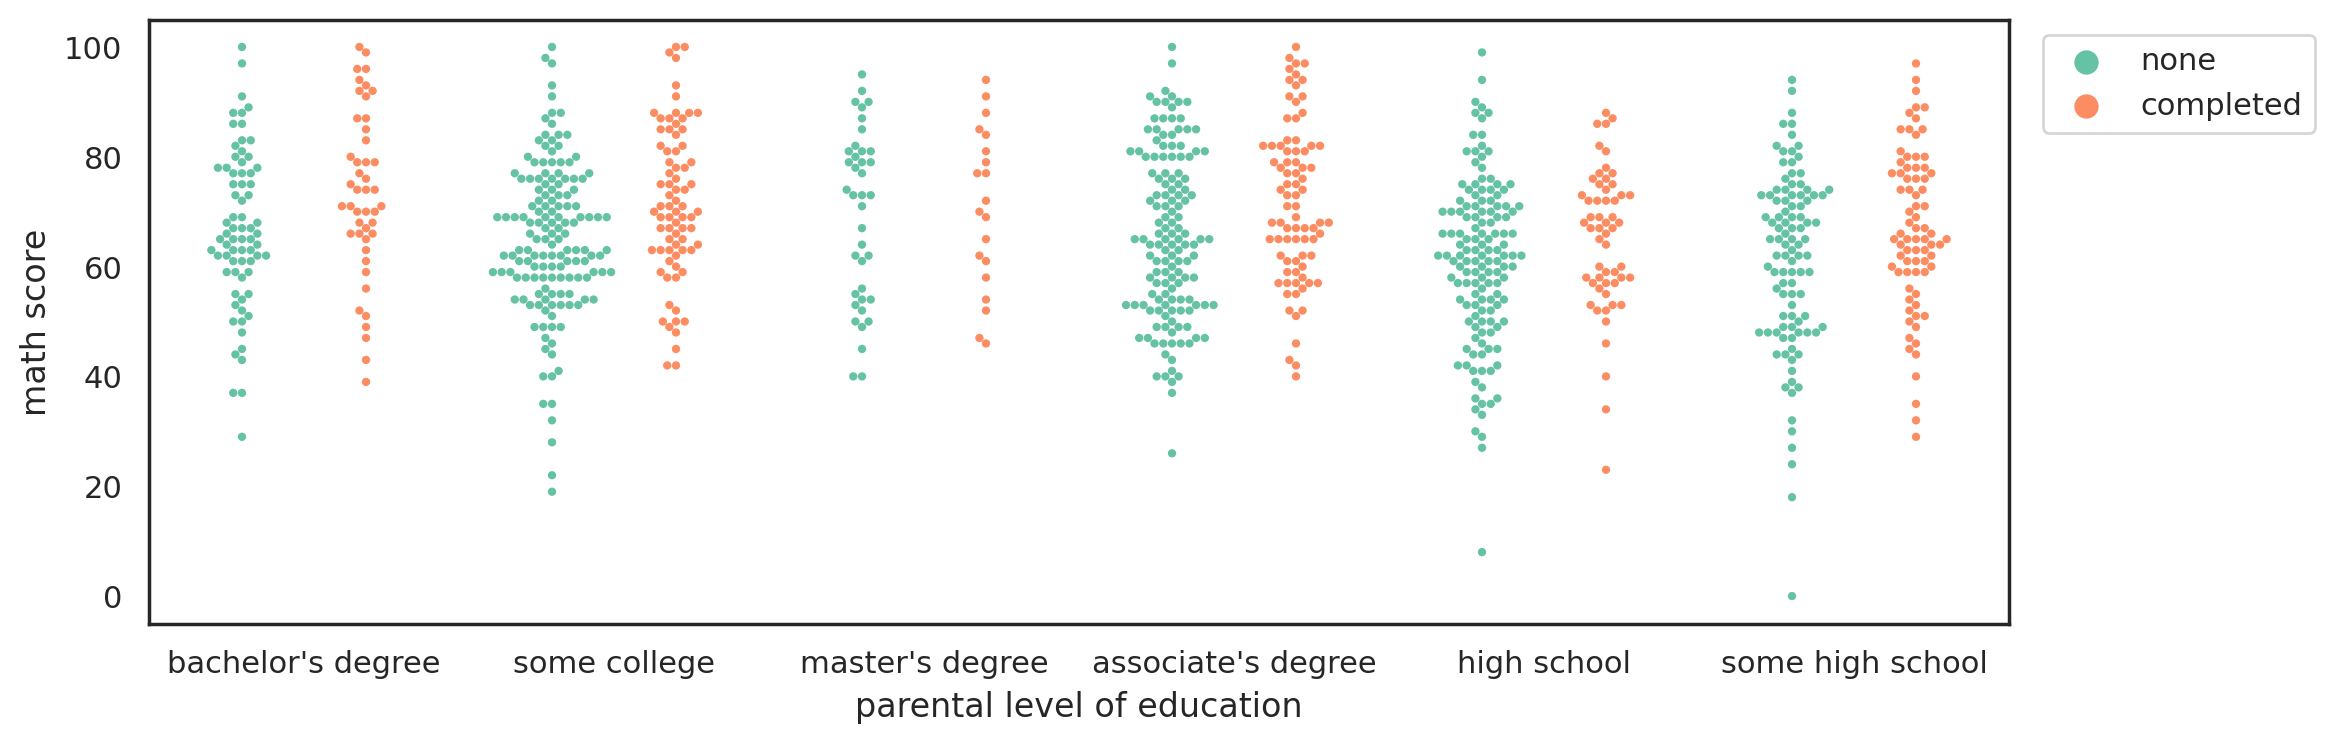

In [20]:
plt.figure(figsize=(12,4), dpi=200)
sns.swarmplot(y='math score', data=df,
              x='parental level of education',
              hue='test preparation course',
              size=3, # change size to accomodate all the points
              dodge=True, # separate sworm plots for each sub-catg.
              palette='Set2');
plt.legend(bbox_to_anchor=(1.01,1));

### boxenplot()

The boxenplot (Letter-value plot) is a relatively new plot developed in 2011 by Heike Hofmann, Karen Kafadar, and Hadley Wickham. Its mainly designed as an expansion upon the normal box plot. Using a system of letter-values we can use multiple quantiles instead of strictly quartiles.

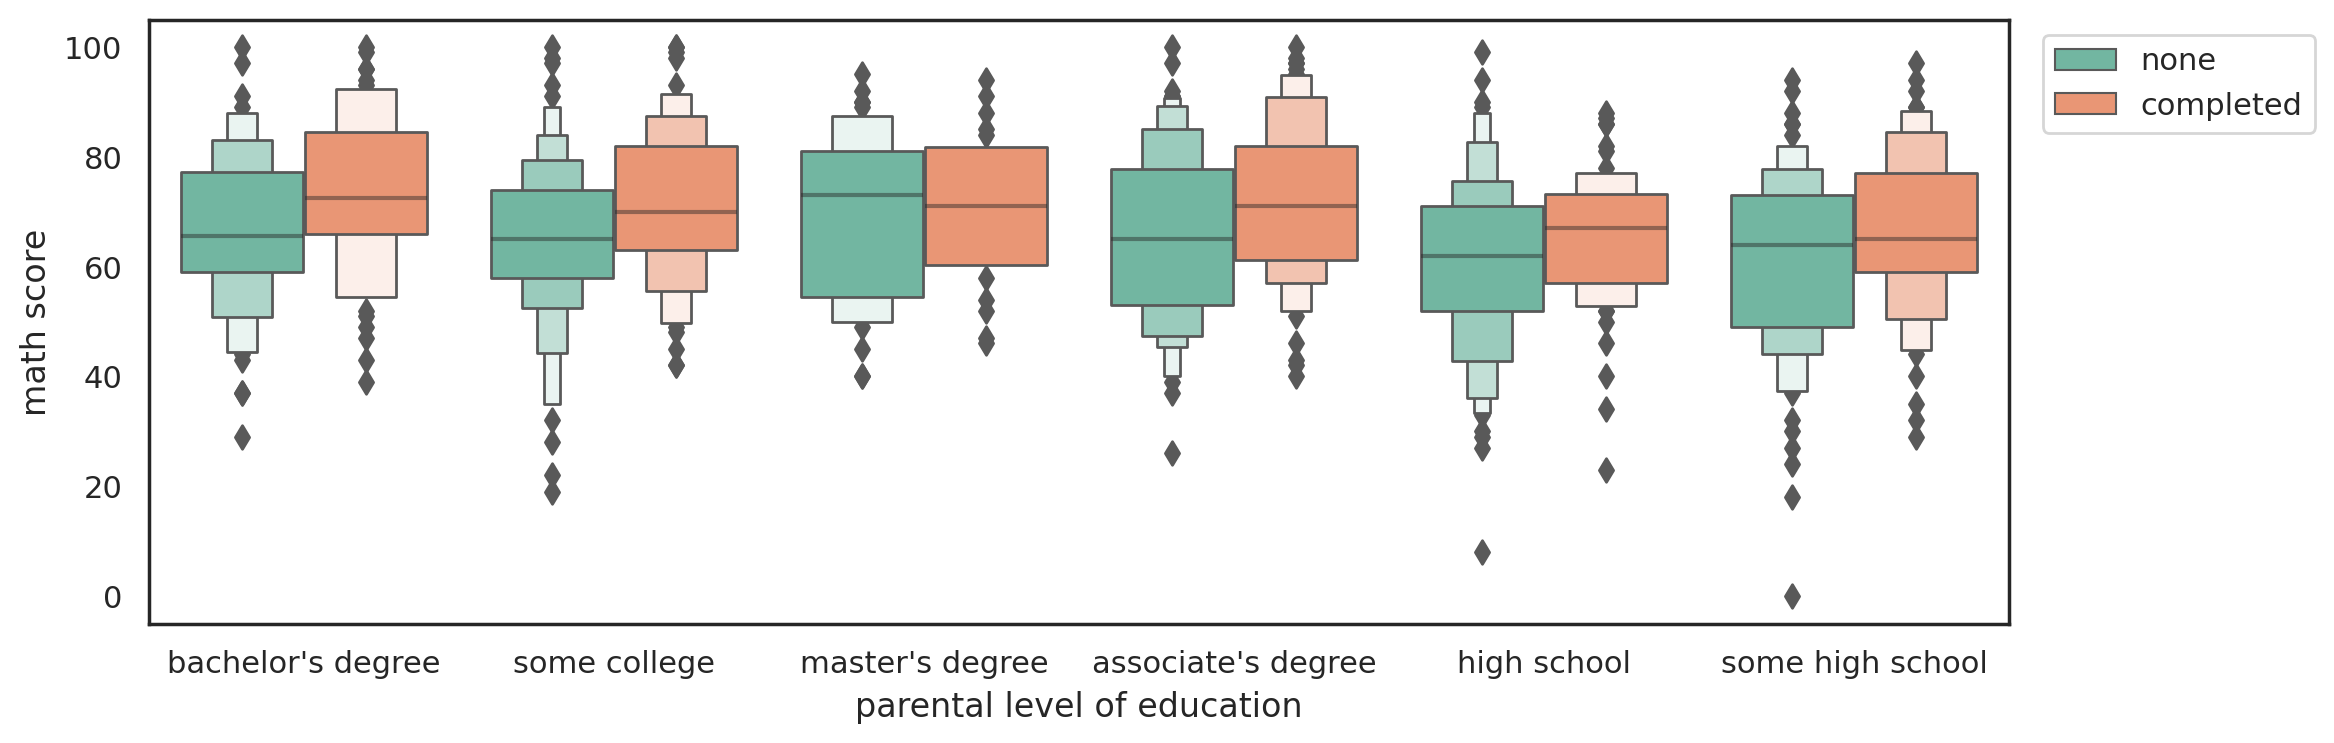

In [21]:
plt.figure(figsize=(12,4), dpi=200)
sns.boxenplot(y='math score', data=df,
              x='parental level of education',
              hue='test preparation course',
              palette='Set2');
plt.legend(bbox_to_anchor=(1.01,1));

<a id='5'></a>
## Comparison Plots

- Comparison plots are essentially 2D versions of the plots we’ve learned about so far.
- The two main plots types discussed here:
    - jointplot()
    - pairplot()

In [22]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
282,female,group D,bachelor's degree,free/reduced,none,73,79,84
230,male,group D,some college,standard,none,76,64,66
408,female,group D,high school,free/reduced,completed,52,57,56
997,female,group C,high school,free/reduced,completed,59,71,65
594,female,group C,bachelor's degree,standard,completed,92,100,99


### jointplot()

The basic jointplot is a scatter plot of **two continuous features** that adds in hitograms.

We can map histograms to each feature of a scatterplot to clarify the distributions within each feature. We can also adjust the scatterplot to be a hex plot or a 2D KDE plot.

<Figure size 1000x1000 with 0 Axes>

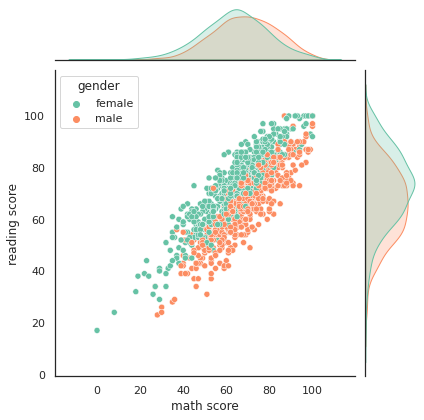

In [23]:
plt.figure(figsize=(5,5), dpi=200)
sns.jointplot(x='math score', data=df,
              y='reading score',
              kind='scatter', # default kind is scatter (use alpha)
              hue='gender',
              palette='Set2');

<Figure size 1000x1000 with 0 Axes>

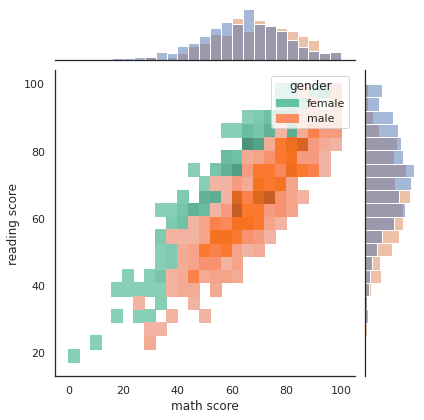

In [24]:
plt.figure(figsize=(5,5), dpi=200)
sns.jointplot(x='math score', data=df,
              y='reading score',
              kind='hist', # can also use hex or kde
              hue='gender',
              palette='Set2');

<Figure size 1000x1000 with 0 Axes>

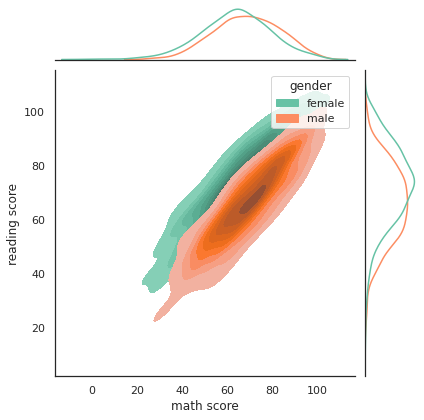

In [25]:
plt.figure(figsize=(5,5), dpi=200)
sns.jointplot(x='math score', data=df,
              y='reading score',
              kind='kde', shade=True,
              hue='gender',
              palette='Set2');

### pairplot()

The pairplot() is a quick way to compare all numerical columns in a DataFrame. It automatically creates a histogram for each column and a scatterplot comparison between all possible combinations of columns.

*Warning!*

pairplot() can be CPU and RAM intensive for large DataFrames with many columns.
It is a good idea to first filter down to only the columns you are interested in.


<Figure size 1000x1000 with 0 Axes>

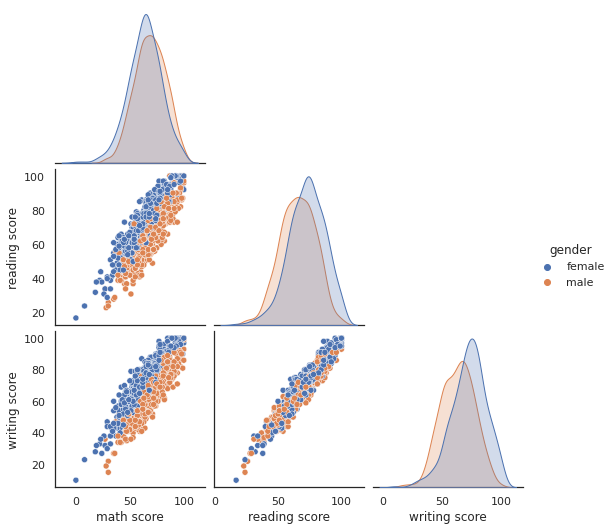

In [26]:
plt.figure(figsize=(5,5), dpi=200)
sns.pairplot(data=df, # grabbing all the numerical columns in df
             hue='gender',
             diag_kind='kde', # default is kde (better than hist)
             corner=True # remove duplicate plots
            );

<a id='6'></a>
## Seaborn Grids

- Seaborn grid calls use Matplotlib subplots() to automatically create a grid based off a categorical column.
- Instead of passing in a specific number of cols or rows for the subplots, we can simply pass in the name of the column and seaborn will automatically map the subplots grid.
- Many of seaborn’s built-in plot calls are running on top of this grid system.
- Directly calling the grid system allows users to heavily customize plots.


In [27]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
679,male,group D,some college,free/reduced,none,63,61,60
512,male,group D,some high school,free/reduced,none,62,49,52
651,female,group A,high school,standard,completed,68,80,76
102,female,group D,associate's degree,standard,none,85,91,89
144,male,group D,some college,standard,none,88,73,78


### catplot() -- base level call for a catagorical call

<Figure size 2000x800 with 0 Axes>

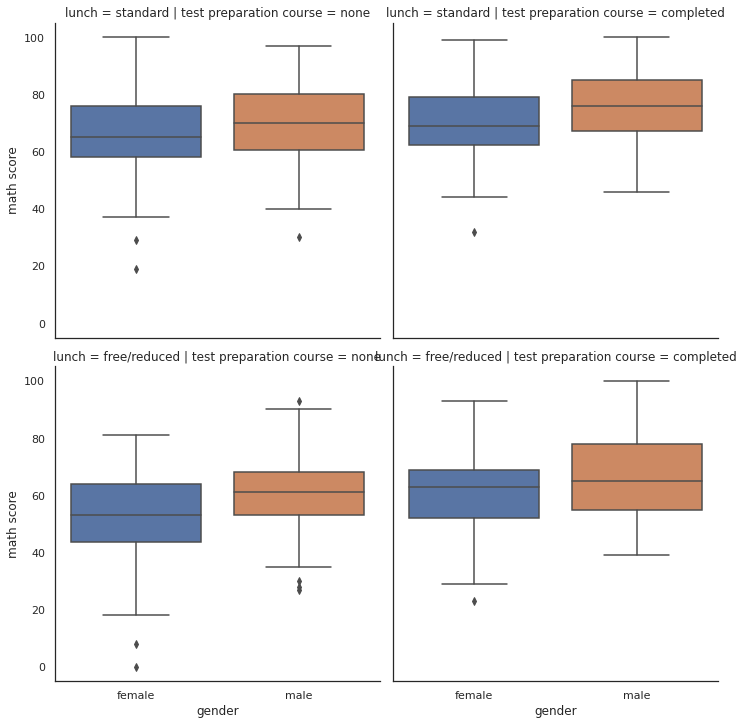

In [28]:
plt.figure(figsize=(10,4), dpi=200)
sns.catplot(x='gender', y='math score', data=df, 
            kind='box',
            row='lunch',                   # row catagory
            col='test preparation course', # col catagory
           );

### PairGrid() -- base level call for a pairplot()

<Figure size 2000x800 with 0 Axes>

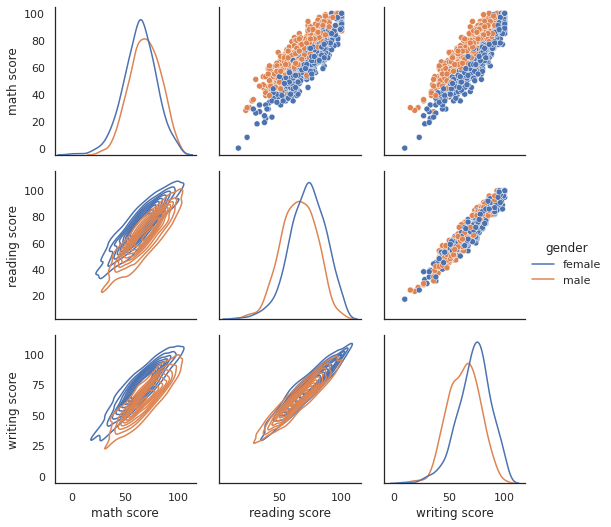

In [29]:
plt.figure(figsize=(10,4), dpi=200)
g = sns.PairGrid(df, hue='gender')
g = g.map_upper(sns.scatterplot)
g = g.map_diag(sns.kdeplot)
g = g.map_lower(sns.kdeplot)
g = g.add_legend()

<a id='7'></a>
## Matrix Plots

- Matrix plots are the visual equivalent of displaying a pivot table.
- The matrix plot displays all the data passed in, visualizing all the numeric values in a DataFrame.
- Not every DataFrame is a valid choice for a matrix plot such as a heatmap.
- The two main matrix plot types are:
    - heatmap(): Visually displays the distribution of cell values with a color mapping.
    - clustermap(): Same visual as heatmap, but first conducts hierarchical clustering to reorganize data into groups.
    
Seaborn also comes with the ability to automatically cluster similar groupings.

In [30]:
df = pd.read_csv('data/country_table.csv')
df

,Countries,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
0,AFRICA,32.577,7.837,63.472,44.215,24.40
1,ASIA,15.796,7.030,73.787,23.185,8.44
2,EUROPE,10.118,11.163,78.740,3.750,0.38
3,LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
4,NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
5,OCEANIA,16.235,6.788,78.880,16.939,12.79
6,WORLD,17.963,7.601,72.766,27.492,10.36


### heatmap()

A heatmap should ideally have all cells be in the same units, so the color mapping makes sense across the entire DataFrame.

In [31]:
# need a labelled index in order to pass this into a heatmap
df = df.set_index('Countries')
df

,Birth rate,Mortality rate,Life expectancy,Infant mortality rate,Growth rate
Countries,,,,,
AFRICA,32.577,7.837,63.472,44.215,24.40
ASIA,15.796,7.030,73.787,23.185,8.44
EUROPE,10.118,11.163,78.740,3.750,0.38
LATIN AMERICA AND THE CARIBBEAN,15.886,6.444,75.649,14.570,8.89
NORTHERN AMERICA,11.780,8.833,79.269,5.563,6.11
OCEANIA,16.235,6.788,78.880,16.939,12.79
WORLD,17.963,7.601,72.766,27.492,10.36


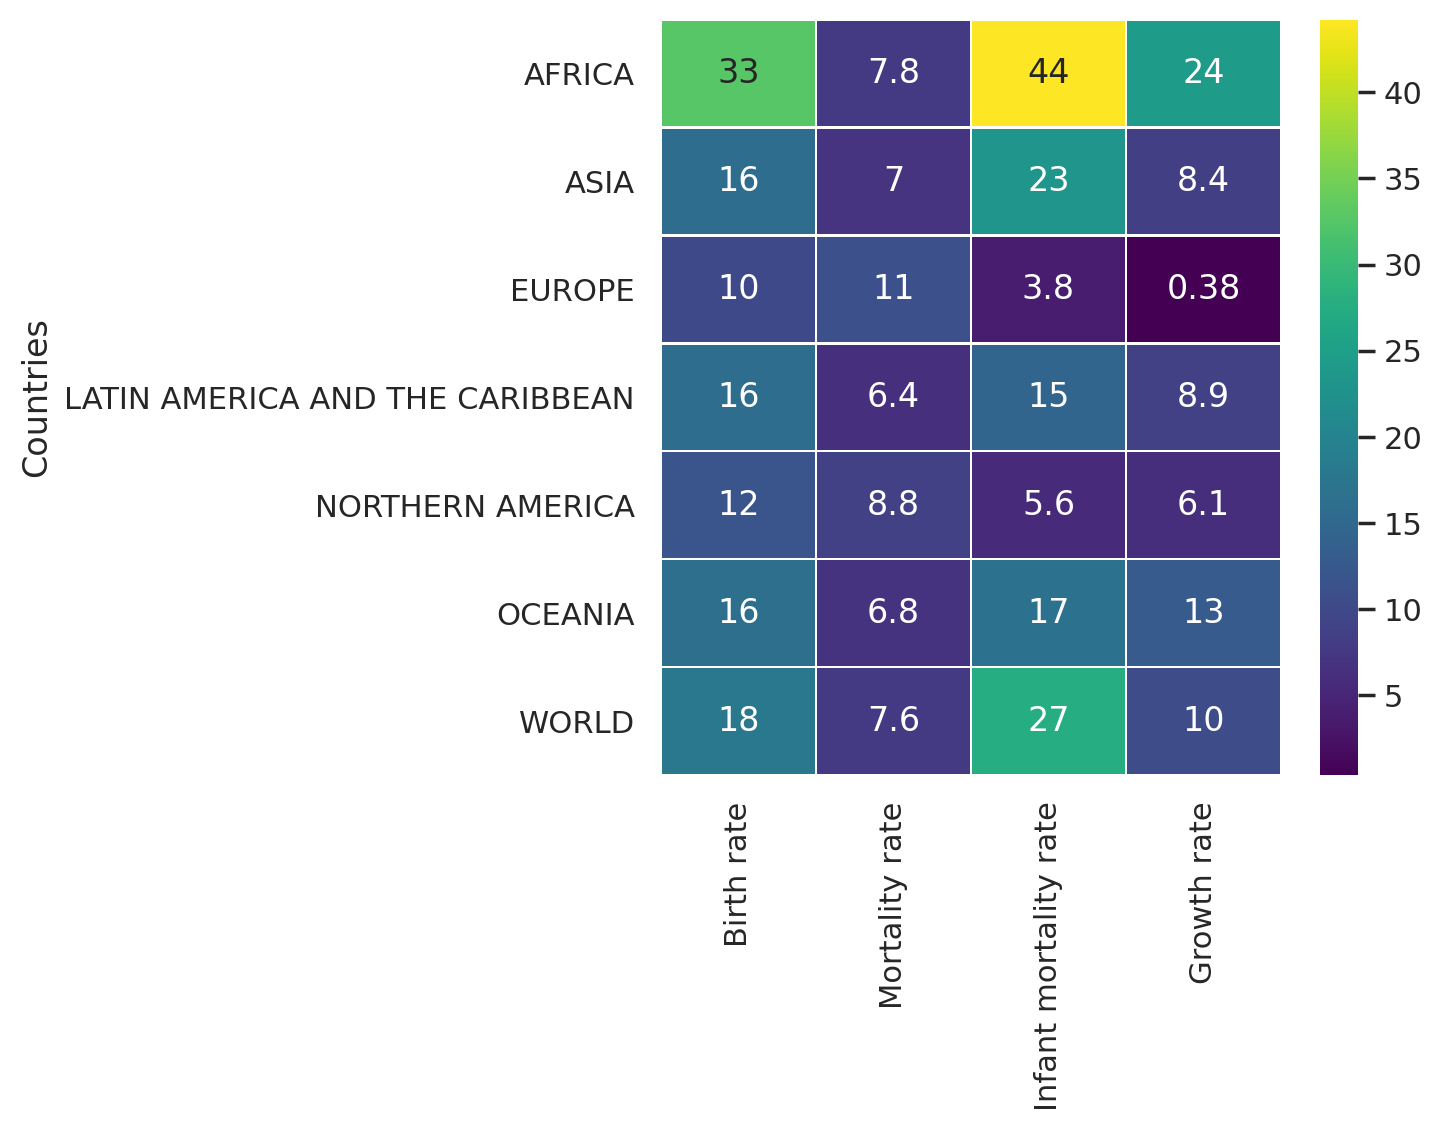

In [32]:
# unit of Life expectancy is not same as rates (all the other cols)
plt.figure(figsize=(5,5), dpi=200)
sns.heatmap(df.drop('Life expectancy', axis=1),
            linewidths=0.5, # adds spacing
            annot=True,     # annotate (also prints the values)
            cmap='viridis'  # NOT palette !!!
           );

### clustermap()

Plot a matrix dataset as a hierarchically-clustered heatmap.

<Figure size 1000x1000 with 0 Axes>

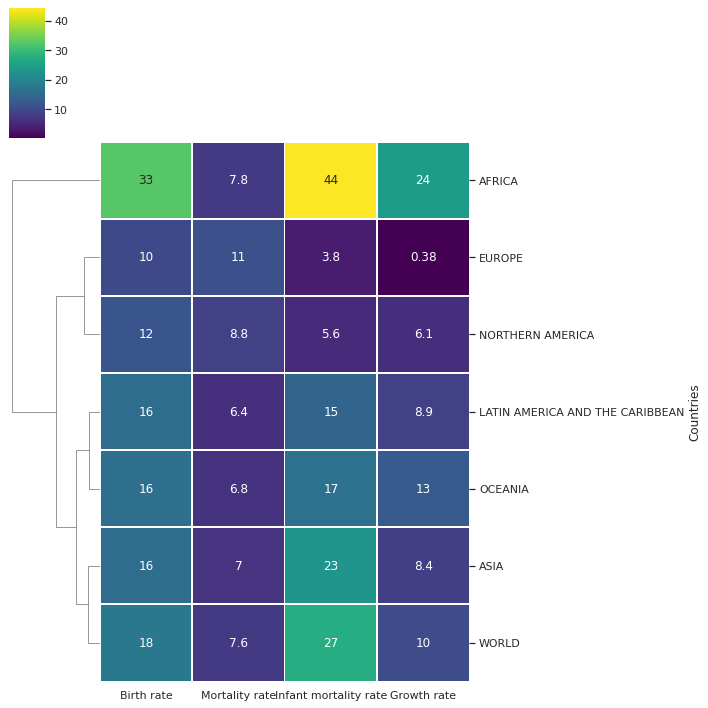

In [33]:
# unit of Life expectancy is not same as rates (all the other cols)
plt.figure(figsize=(5,5), dpi=200)
sns.clustermap(df.drop('Life expectancy', axis=1),
            linewidths=0.5, # adds spacing
            annot=True,     # annotate (also prints the values)
            cmap='viridis', # NOT palette !!!
            col_cluster=False # clustering only over rows
           );